In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque, defaultdict

**DAS**

In [2]:
def DAS(accesses,size,partition):
  # LRU portion and LFU portion..
  LRU_size = (int)(partition*size)
  LFU_size = size-LRU_size

  # print(LRU_size)
  # print(LFU_size)

  # print(LRU_size);
  # print(LFU_size);
  # variables to keep track of hits..
  hits = miss = 0;
  LRU_hit = LFU_hit = 0;

  # LRU and LFU cache..
  LRU_cache = deque();
  LFU_cache = deque();

  # map for storing frequencies..
  LRU_freq = defaultdict(int);
  LFU_freq = defaultdict(int);
  freq = defaultdict(int);

  for block in accesses :
    freq[block] = freq[block]+1;

    if block not in LRU_cache and block not in LFU_cache :
      miss = miss+1;
      # if space is available in cache..
      if (len(LRU_cache)+len(LFU_cache)) < size :
        # checking for LRU..
        if len(LFU_cache) < LFU_size :
          LFU_cache.append(block);
          LFU_freq[block] += 1;
        # checking for LFU..
        elif len(LRU_cache) < LRU_size :
          LRU_cache.append(block);
          LRU_freq[block] += 1;
      # if space is not available in cache..
      else :
        remove_block = LRU_cache.popleft();
        del LRU_freq[remove_block];
        LRU_cache.append(block);
        LRU_freq[block] = freq[block];

    else :
      hits = hits+1;
      # present in LFU cache..
      if block in LFU_cache :
        LFU_freq[block] += 1;
        LFU_hit += 1;
      # present in LRU cache..
      elif block in LRU_cache :
        LRU_freq[block] += 1;
        LRU_hit += 1;
        # we need to check whethe it can be added to LFU or not..
        if len(LFU_cache) < LFU_size :
          LRU_cache.remove(block);
          LFU_freq[block] = LRU_freq[block];
          LFU_cache.append(block);
          del LRU_freq[block];
        else :
          mini,mini_freq = min(LFU_freq.items(),key = lambda a: a[1])
          # if minimum frequency in LFU is less than block's frequency..swap these two..
          if mini_freq < LRU_freq[block] :
            # adding block to LFU..
            LRU_cache.remove(block);
            LFU_cache.append(block);
            LFU_freq[block] = LRU_freq[block];
            del LRU_freq[block];
            # adding mini to LRU..
            LFU_cache.remove(mini);
            LRU_cache.append(mini);
            LRU_freq[mini] = mini_freq;
            del LFU_freq[mini];

  hit_ratio = hits/(hits+miss);
  return hit_ratio;

**DAS_adaptive**

In [3]:
def DAS_adaptive(accesses,size,partition):
  # LRU portion and LFU portion..
  LRU_size = (int)(partition*size)
  LFU_size = size-LRU_size

  # variables to keep track of hits..
  hits = miss = 0;
  LRU_hit = LFU_hit = 0;

  # LRU and LFU cache..
  LRU_cache = deque();
  LFU_cache = deque();

  #ghost cache...
  ghost_lru = deque()
  ghost_lfu = deque()

  ghost_size = size/2;

  # map for storing frequencies..
  LRU_freq = defaultdict(int);
  LFU_freq = defaultdict(int);
  freq = defaultdict(int);

  for block in accesses :
    freq[block] = freq[block]+1;
    # print(LRU_size)
    # print(LFU_size)

    if block not in LRU_cache and block not in LFU_cache :
      miss = miss+1;
      # if space is available in cache..
      if (len(LRU_cache)+len(LFU_cache)) < size :
        # checking for LRU..
        if len(LFU_cache) < LFU_size :
          LFU_cache.append(block);
          LFU_freq[block] += 1;
        # checking for LFU..
        elif len(LRU_cache) < LRU_size :
          LRU_cache.append(block);
          LRU_freq[block] += 1;

      # if space is not available in cache..
      else :
        if block in ghost_lru or block in ghost_lfu :
          if block in ghost_lru : 

            if LFU_size == 0: 
              remove_block = LRU_cache.popleft();
              ghost_lru.popleft();
              ghost_lru.append(remove_block)
              LRU_cache.append(block)
              LRU_freq[block] = freq[block]

            #if LFU is non empty then decrease LFU size by one and increase LRU size by one  
            else :  
              mini,mini_freq = min(LFU_freq.items(),key = lambda a: a[1])
              LFU_cache.remove(mini);
              del LFU_freq[mini];
              # remove_block = LFU_cache.pop_left()
              if len(ghost_lfu) < ghost_size :
                ghost_lfu.append(mini)
              else :
                ghost_lfu.popleft()
                ghost_lfu.append(mini)

              LFU_size = LFU_size-1
              LRU_cache.append(block)
              LRU_freq[block] = freq[block]
              LRU_size = LRU_size+1

          else :
            remove_block = LRU_cache.popleft()
            del LRU_freq[remove_block];

            if len(ghost_lru) < ghost_size :
              ghost_lru.append(remove_block)
            else :
              ghost_lru.popleft()
              ghost_lru.append(remove_block)

            if LFU_size == 0:
              LFU_cache.append(block)
              LFU_freq[block] = freq[block]

            #putting vlock from ghost lfu to LRU or LFU    
            else :
              mini,mini_freq = min(LFU_freq.items(),key = lambda a: a[1])
              if freq[block] < mini_freq :
                LRU_cache.append(block)
                LRU_freq[block] = freq[block]
              else :
                LFU_cache.append(block)
                LFU_freq[block] = freq[block]
                LFU_size = LFU_size+1;
                LRU_size = LRU_size-1;

        else:
          # putting block in LRU and removed block in ghost LRU
          remove_block = LRU_cache.popleft();

          if len(ghost_lru) < ghost_size :
              ghost_lru.append(remove_block)
          else :
            ghost_lru.popleft()
            ghost_lru.append(remove_block)

          del LRU_freq[remove_block];
          LRU_cache.append(block);
          LRU_freq[block] = freq[block];

    else :
      hits = hits+1;
      # present in LFU cache..
      if block in LFU_cache :
        LFU_freq[block] += 1;
        LFU_hit += 1;
      # present in LRU cache..
      elif block in LRU_cache :
        LRU_freq[block] += 1;
        LRU_hit += 1;
        # we need to check whethe it can be added to LFU or not..
        if len(LFU_cache) < LFU_size :
          LRU_cache.remove(block);
          LFU_freq[block] = LRU_freq[block];
          LFU_cache.append(block);
          del LRU_freq[block];
        else :
          if LFU_size != 0 :
            mini,mini_freq = min(LFU_freq.items(),key = lambda a: a[1])
            # if minimum frequency in LFU is less than block's frequency..swap these two..
            if mini_freq < LRU_freq[block] :
              # adding block to LFU..
              LRU_cache.remove(block);
              LFU_cache.append(block);
              LFU_freq[block] = LRU_freq[block];
              del LRU_freq[block];
              # adding mini to LRU..
              LFU_cache.remove(mini);
              LRU_cache.append(mini);
              LRU_freq[mini] = mini_freq;
              del LFU_freq[mini];

  hit_ratio = hits/(hits+miss);
  return hit_ratio;

In [4]:
#trace file conversion

def list_dec(f1) :
  l = f1.readlines();
  ref = [];
  for i in l :
    j = int(i,16);
    ref.append(j);
  return ref;

def list_trace(f1) :
  l = f1.readlines();
  ref = [];
  for i in l :
    s = i[2:12];
    j = int(s,16);
    ref.append(j);
  return ref;

**Comparing DAS and Adaptive DAS**

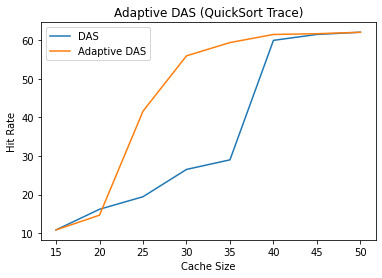

In [6]:
size =[15,20,25,30,35,40,45,50] #cache size

files = open('sort1','r');
accesses = list_dec(files);   #choose the list_trace and list_dec according to the trace file
#print(len(accesses))

das = []
das_adaptive = []

for sz in size:
  das.append(DAS(accesses,sz,0.5)*100)
  das_adaptive.append(DAS_adaptive(accesses,sz,0.5)*100)
  #print(sz)

plt.plot(size,das,label = 'DAS')
plt.plot(size,das_adaptive, label = 'Adaptive DAS')

plt.title("Adaptive DAS (QuickSort Trace)")
plt.xlabel("Cache Size")
plt.ylabel("Hit Rate")

plt.legend();
plt.show();